# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [ ]:
#%pip install tensorflow[and-cuda] numpy==1.25.2 -q

In [1]:

import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [2]:
with tf.device('/GPU:0'):
         a = tf.constant([1.0, 2.0, 3.0])
         b = tf.constant([4.0, 5.0, 6.0])
         c = a + b
         print(c)



tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)


2025-07-27 15:18:36.046364: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-07-27 15:18:36.046389: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-07-27 15:18:36.046392: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-07-27 15:18:36.046409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-27 15:18:36.046419: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using matplotlib (alternative to cv2_imshow for Jupyter Notebooks)
def cv2_imshow(image):
	"""Display an image using matplotlib."""
	plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
	plt.axis('off')
	plt.show()

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


## Loading the data

In [5]:
images = np.load('images_proj.npy') 

labels = pd.read_csv('Labels_proj.csv')
# Verify the shape of the images and labels
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

# Check the first few entries of labels to ensure they are loaded correctly
print("First few labels:")
print(labels.head())

Shape of images: (631, 200, 200, 3)
Shape of labels: (631, 1)
First few labels:
   Label
0      1
1      1
2      1
3      1
4      1


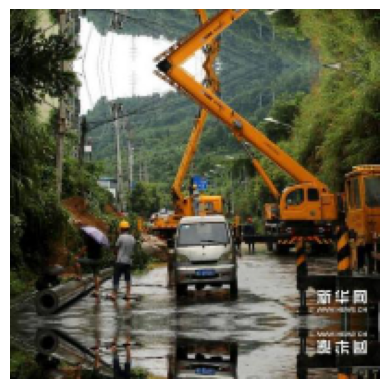

In [6]:
# Display the first image in the dataset
cv2_imshow(images[0])

# **Exploratory Data Analysis**

### Plot random images from each of the classes and print their corresponding labels.

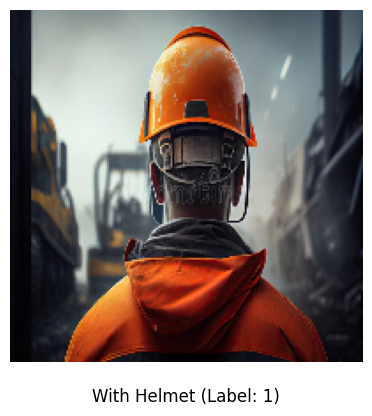

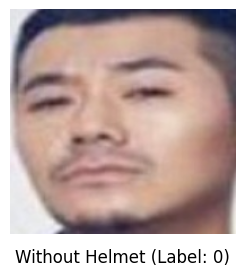

Label for image with helmet: 1
Label for image without helmet: 0


In [7]:
# Get indices for each class
with_helmet_indices = labels[labels['Label'] == 1].index
without_helmet_indices = labels[labels['Label'] == 0].index

# Randomly select one image from each class
random_with_helmet = random.choice(with_helmet_indices)
random_without_helmet = random.choice(without_helmet_indices)
# Swap the indices if needed to ensure correct alignment
if labels.iloc[random_with_helmet]['Label'] != 1:
    random_with_helmet, random_without_helmet = random_without_helmet, random_with_helmet
# Plot the images
plt.figure(figsize=(10, 5))

# Image with helmet
plt.subplot(1, 2, 1)
plt.text(0.5, -0.1, f"With Helmet (Label: {labels.iloc[random_with_helmet]['Label']})", 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
#plt.text(0.5, -0.1, "With Helmet", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
cv2_imshow(images[random_with_helmet])
#plt.axis('off')

plt.subplot(1, 2, 1)
plt.text(0.5, -0.1, f"Without Helmet (Label: {labels.iloc[random_without_helmet]['Label']})", 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
#plt.text(0.5, -0.1, "With Helmet", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
cv2_imshow(images[random_without_helmet])

# Print corresponding labels
print(f"Label for image with helmet: {labels.iloc[random_with_helmet]['Label']}")
print(f"Label for image without helmet: {labels.iloc[random_without_helmet]['Label']}")

## Checking for class imbalance


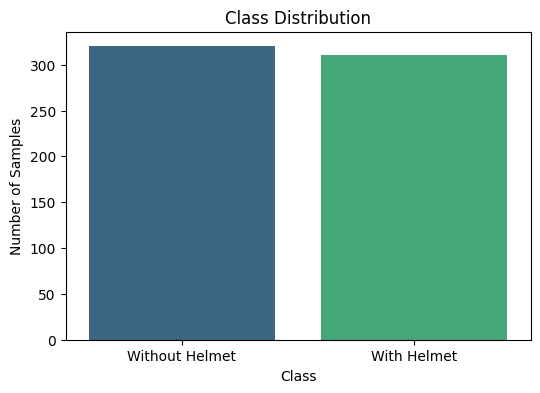

Class Distribution:
0    320
1    311
Name: Label, dtype: int64


In [8]:
# Count the number of samples in each class
class_distribution = labels['Label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(ticks=[0, 1], labels=["Without Helmet", "With Helmet"])
plt.show()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)


### Class Imbalance Summary

The dataset contains **631 images** divided into two classes:

- **With Helmet:** 311 images (49.3%)
- **Without Helmet:** 320 images (50.7%)

The class distribution is relatively balanced, with a slight majority of images in the "Without Helmet" category.


# **Data Preprocessing**

## Converting images to grayscale

Original Image 628:


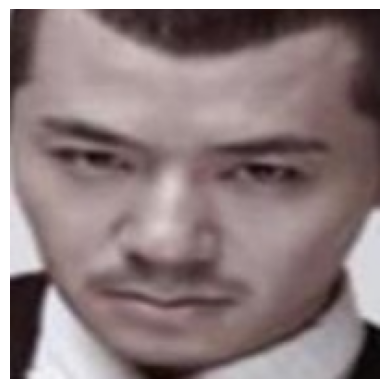

Grayscale Image 628:


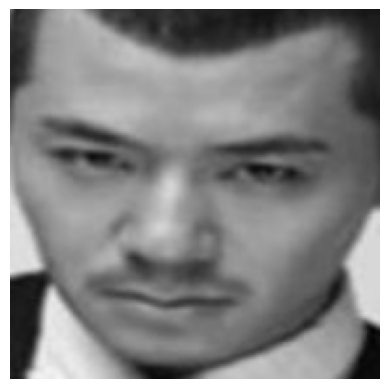

Original Image 302:


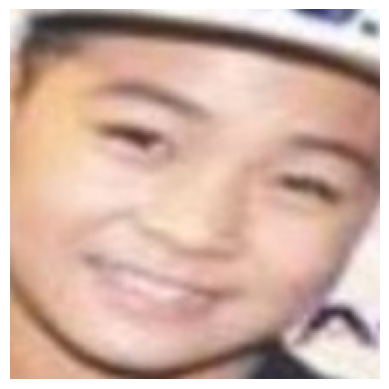

Grayscale Image 302:


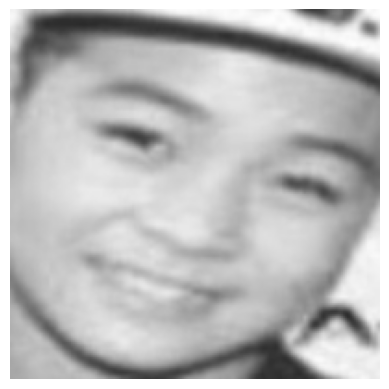

Original Image 360:


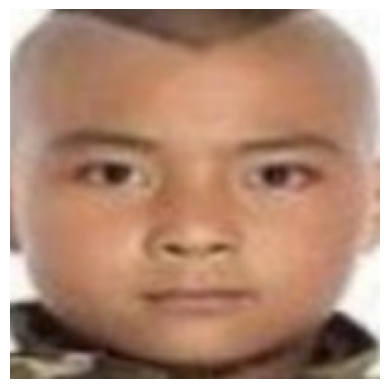

Grayscale Image 360:


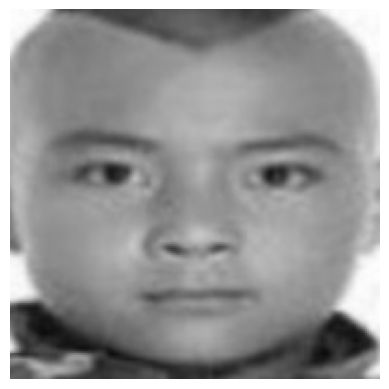

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [9]:
# Convert images to grayscale
images_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images])


# Select random indices to display
random_indices = random.sample(range(len(images)), 3)

# Display a few before and after images for comparison
for idx in random_indices:
    print(f"Original Image {idx}:")
    cv2_imshow(images[idx])
    print(f"Grayscale Image {idx}:")
    cv2_imshow(images_gray[idx])
plt.figure(figsize=(10, 10))



### Splitting the dataset



```markdown
### Converting Images to Grayscale

To prepare the images for the CNN model, we convert them to grayscale. Grayscale images reduce computational complexity while retaining essential features for classification tasks. This step simplifies the input data by reducing the number of channels from 3 (RGB) to 1, making it suitable for the CNN model.
```

In [10]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    images_gray, labels['Label'], test_size=0.2, random_state=42, stratify=labels['Label']
)

# Further split the temporary set into validation and testing sets (50% of 20% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Verify the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (504, 200, 200) (504,)
Validation set shape: (63, 200, 200) (63,)
Testing set shape: (64, 200, 200) (64,)


### Data Normalization

In [11]:
# Normalize the datasets
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Verify the normalization
print("Normalized X_train range:", X_train.min(), "to", X_train.max())
print("Normalized X_val range:", X_val.min(), "to", X_val.max())
print("Normalized X_test range:", X_test.min(), "to", X_test.max())

Normalized X_train range: 0.0 to 1.0
Normalized X_val range: 0.0 to 1.0
Normalized X_test range: 0.0 to 1.0


# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [12]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [13]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

### Model 1: Simple Convolutional Neural Network (CNN)

In [14]:
# Define the CNN model
cnn_model = Sequential([
    # Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(images_gray.shape[1], images_gray.shape[2], 1)),
    MaxPooling2D((2, 2)),  # Max pooling layer with pool size of 2x2

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output of the convolutional layers
    Flatten(),

    # Fully connected dense layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    18,874,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,893,441 (72.07 MB)

 Trainable params: 18,893,441 (72.07 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the CNN model
history = cnn_model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=32
)

# Print the training history
print("Training completed.")

Epoch 1/10


2025-07-26 13:30:59.269333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4954 - loss: 9.1763 - val_accuracy: 0.5079 - val_loss: 2.2467
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5212 - loss: 1.8929 - val_accuracy: 0.5714 - val_loss: 0.4253
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8444 - loss: 0.3724 - val_accuracy: 0.8571 - val_loss: 0.3031
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9292 - loss: 0.1923 - val_accuracy: 0.8730 - val_loss: 0.2923
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8810 - loss: 0.3567 - val_accuracy: 0.9683 - val_loss: 0.0389
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9451 - loss: 0.1628 - val_accuracy: 0.9683 - val_loss: 0.0813
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9545 - loss: 0.1336 - val_accuracy: 1.0000 - val_loss: 0.0222
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9781 - loss: 0.0602 - val_accuracy: 0.9841 - val_loss: 0.

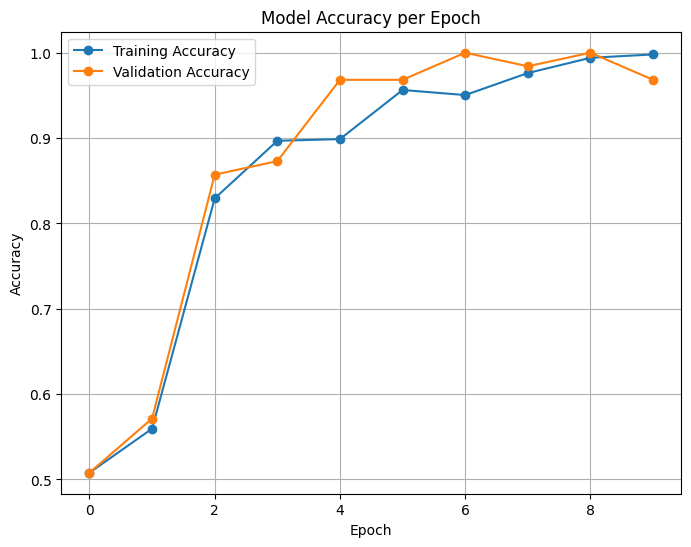

In [16]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Performance metrics for the training dataset
print("Performance Metrics for Training Dataset:")
train_performance = model_performance_classification(cnn_model, X_train, y_train)
print(train_performance)

# Performance metrics for the validation dataset
print("Performance Metrics for Validation Dataset:")
val_performance = model_performance_classification(cnn_model, X_val, y_val)
print(val_performance)

Performance Metrics for Training Dataset:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.990079  0.990079   0.990269  0.990077
Performance Metrics for Validation Dataset:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.968254  0.968254   0.970121  0.968206


### Vizualizing the predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Performance Metrics:
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
Confusion Matrix:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


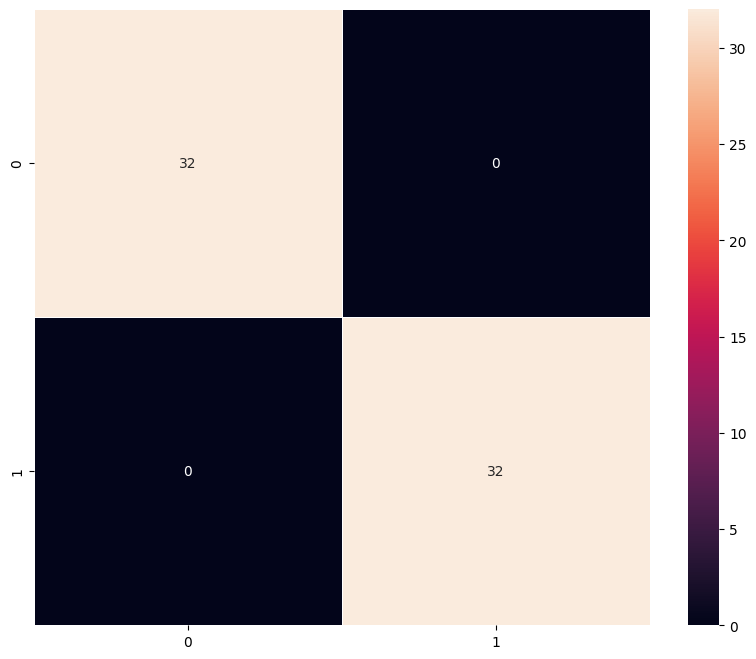

In [18]:
# Get predictions from the model
predictions = (cnn_model.predict(X_test) > 0.5).astype(int)

# Evaluate the model on the test set
test_performance = model_performance_classification(cnn_model, X_test, y_test)
print("Test Performance Metrics:")
print(test_performance)

# Plot the confusion matrix for the test set
print("Confusion Matrix:")
plot_confusion_matrix(cnn_model, X_test, y_test, ml=True)


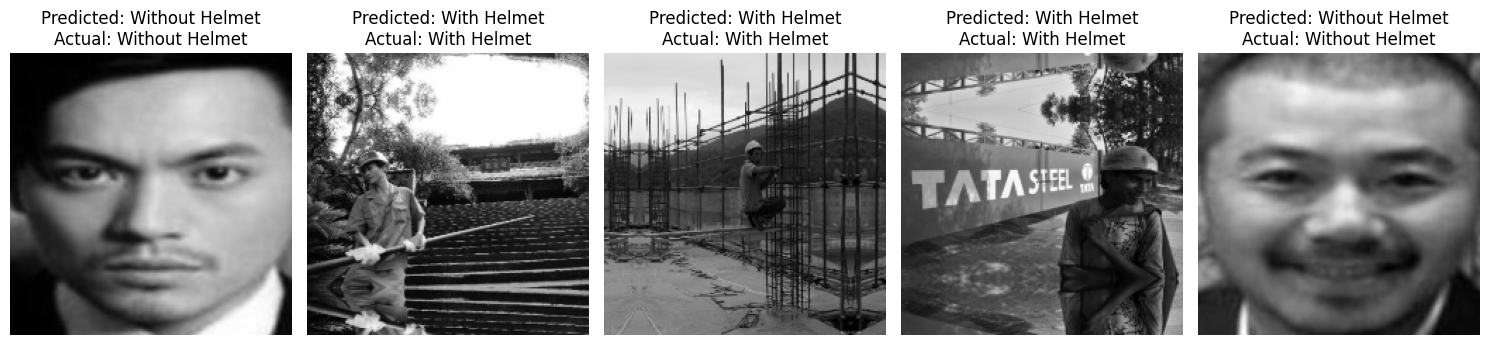

In [19]:
# Select random indices from the test set
random_test_indices = random.sample(range(len(X_test)), 5)

# Plot the selected images along with their predicted and actual labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_test_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Display the image using matplotlib
    predicted_label = predictions[idx][0]
    actual_label = y_test.iloc[idx]
    plt.title(f"Predicted: {'With Helmet' if predicted_label == 1 else 'Without Helmet'}\nActual: {'With Helmet' if actual_label == 1 else 'Without Helmet'}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Model 2: (VGG-16 (Base))

In [7]:
# Load the VGG-16 model pre-trained on ImageNet without the top classification layers
# Use the regular images directly
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(images.shape[1], images.shape[2], images.shape[3]))

# Freeze the layers of the VGG-16 base model to prevent them from being updated during training
for layer in vgg16_base.layers:
    layer.trainable = False


In [8]:
# Add custom layers on top of the VGG-16 base model
vgg16_model = Sequential([
    vgg16_base,  # Use the VGG-16 base model as the first layer

    # Global Average Pooling instead of Flatten + Dense layers
    tf.keras.layers.GlobalAveragePooling2D(),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
vgg16_model.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

# Print the model summary
vgg16_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Verify the updated shapes of the datasets
print("Updated Training set shape:", X_train.shape)
print("Updated Validation set shape:", X_val.shape)
print("Updated Testing set shape:", X_test.shape)
# Example: Modify the split ratios if needed
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(
   images , labels['Label'], test_size=0.2, random_state=42, stratify=labels['Label']
)

# Further split the temporary set into validation and testing sets (50% of 20% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Verify the shapes of the new splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
# Normalize the images
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Verify the normalization
print("Normalized X_train range:", X_train.min(), "to", X_train.max())
print("Normalized X_val range:", X_val.min(), "to", X_val.max())
print("Normalized X_test range:", X_test.min(), "to", X_test.max())

NameError: name 'X_train' is not defined

Normalized X_train range: 0.0 to 1.0
Normalized X_val range: 0.0 to 1.0
Normalized X_test range: 0.0 to 1.0


In [57]:
# Ensure X_train and y_train have matching dimensions
if len(X_train) != len(y_train):
    raise ValueError(f"Mismatch in the number of samples: X_train has {len(X_train)} samples, but y_train has {len(y_train)} samples.")

# Ensure X_train and X_val have the correct shape for the model input
if X_train.ndim != 4 or X_val.ndim != 4:
    raise ValueError(f"Input data must be 4-dimensional (batch_size, height, width, channels). Got X_train.ndim={X_train.ndim}, X_val.ndim={X_val.ndim}")

# Ensure y_train and y_val are 1-dimensional
if y_train.ndim != 1 or y_val.ndim != 1:
    raise ValueError(f"Labels must be 1-dimensional. Got y_train.ndim={y_train.ndim}, y_val.ndim={y_val.ndim}")

# Train the VGG-16 model
vgg16_history = vgg16_model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=32
)

# Print the training history
print("Training completed.")

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.5723 - loss: 0.6324 - val_accuracy: 0.9524 - val_loss: 0.5683
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9909 - loss: 0.5346 - val_accuracy: 1.0000 - val_loss: 0.4827
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9927 - loss: 0.4551 - val_accuracy: 1.0000 - val_loss: 0.4121
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9972 - loss: 0.3861 - val_accuracy: 1.0000 - val_loss: 0.3555
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9985 - loss: 0.3321 - val_accuracy: 1.0000 - val_loss: 0.3098
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9985 - loss: 0.2890 - val_accuracy: 1.0000 - val_loss: 0.2726
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9989 - loss: 0.2538 - val_accuracy: 1.0000 - val_loss: 0.2419
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9989 - loss: 0.2249 - val_accuracy: 1.

### Visualizing the prediction:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


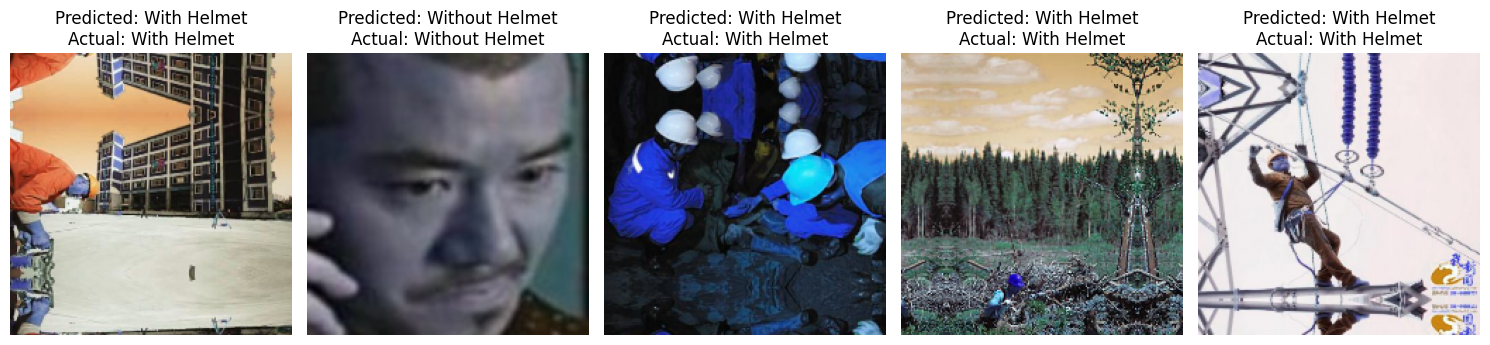

In [58]:
# Select random indices from the validation set
random_val_indices = random.sample(range(len(X_val)), 5)

# Plot the selected images along with their predicted and actual labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_val_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_val[idx], cmap='gray')  # Display the image using matplotlib
    predicted_label = (vgg16_model.predict(X_val[idx].reshape(1, *X_val[idx].shape)) > 0.5).astype(int)[0][0]
    actual_label = y_val.iloc[idx]
    plt.title(f"Predicted: {'With Helmet' if predicted_label == 1 else 'Without Helmet'}\nActual: {'With Helmet' if actual_label == 1 else 'Without Helmet'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

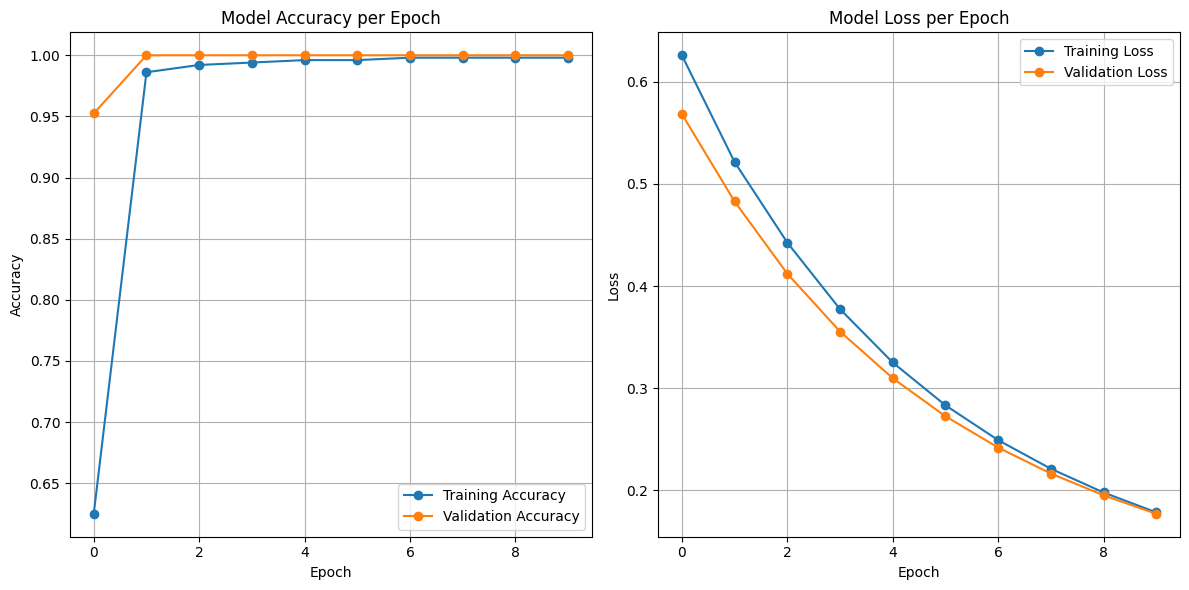

In [60]:
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Training Loss', marker='o')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Performance Metrics for Training Dataset:
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.998016  0.998016   0.998024  0.998016
Performance Metrics for Validation Dataset:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
Performance Metrics for Test Dataset:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
Confusion Matrix for Test Dataset:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


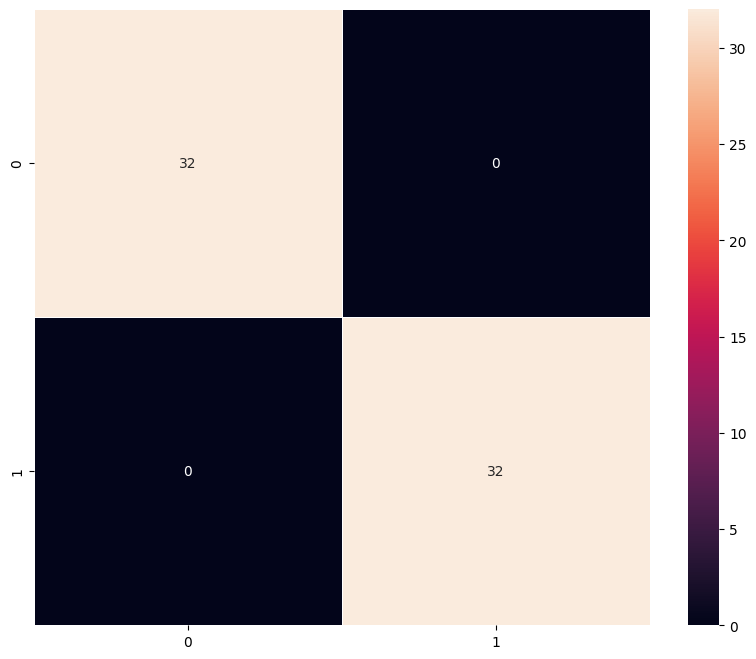

In [61]:
# Prediction metrics for the training dataset
print("Performance Metrics for Training Dataset:")
train_performance = model_performance_classification(vgg16_model, X_train, y_train)
print(train_performance)

# Prediction metrics for the validation dataset
print("Performance Metrics for Validation Dataset:")
val_performance = model_performance_classification(vgg16_model, X_val, y_val)
print(val_performance)

# Prediction metrics for the test dataset
print("Performance Metrics for Test Dataset:")
test_performance = model_performance_classification(vgg16_model, X_test, y_test)
print(test_performance)

# Confusion matrix for the test dataset
print("Confusion Matrix for Test Dataset:")
plot_confusion_matrix(vgg16_model, X_test, y_test, ml=True)

## Model 3: (VGG-16 (Base + FFNN))

In [62]:
# Use the existing VGG-16 base model
vgg16_base_ffnn = vgg16_base

# Add custom layers on top of the VGG-16 base model
vgg16_ffnn_model = Sequential([
    vgg16_base_ffnn,  # Use the VGG-16 base model as the first layer

    # Flatten the output of the VGG-16 base model
    Flatten(),

    # Fully connected dense layer with ReLU activation
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting

    # Another fully connected dense layer with ReLU activation
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
vgg16_ffnn_model.compile(optimizer='adam', 
                         loss='binary_crossentropy', 
                         metrics=['accuracy'])

# Print the model summary
vgg16_ffnn_model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,283,969 (92.64 MB)

 Trainable params: 9,569,281 (36.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [63]:
# Train the VGG-16 FFNN model
vgg16_ffnn_history = vgg16_ffnn_model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=32
)

# Print the training history
print("Training completed.")

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.7341 - loss: 2.0833 - val_accuracy: 1.0000 - val_loss: 1.8922e-09
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9439 - loss: 0.8512 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.9946 - loss: 0.0580 - val_accuracy: 1.0000 - val_loss: 3.1978e-07
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9774 - loss: 0.5041 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9870 - loss: 0.1135 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 1.0000 - loss: 4.6573e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 1.0000 - loss: 4.7759e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.99

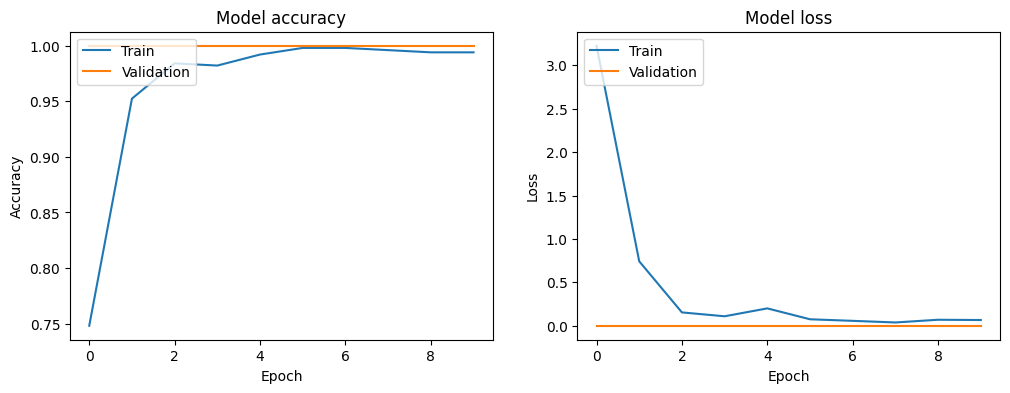

In [50]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(vgg16_ffnn_history.history['accuracy'])
plt.plot(vgg16_ffnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(vgg16_ffnn_history.history['loss'])
plt.plot(vgg16_ffnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### Visualizing the predictions

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

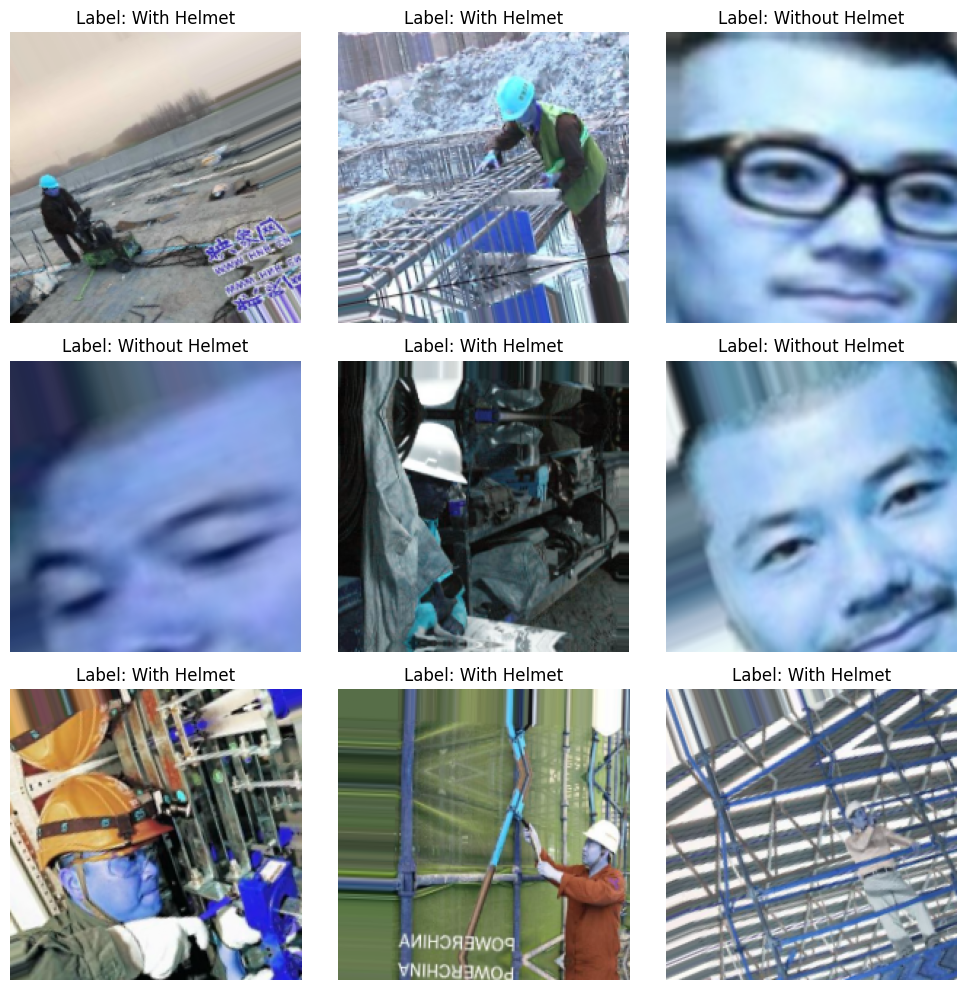

In [66]:
# Define the data augmentation generator
data_augmentation = ImageDataGenerator(
    rotation_range=30,       # Random rotation between 0 and 30 degrees
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,         # Random shear
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'      # Fill mode for newly created pixels
)

# Apply data augmentation to the training dataset
train_generator = data_augmentation.flow(
    X_train, 
    y_train, 
    batch_size=32
)

# Example: Display augmented images
augmented_images, augmented_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 augmented images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i], cmap='gray')
    plt.title(f"Label: {'With Helmet' if augmented_labels[i] == 1 else 'Without Helmet'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [65]:
# Define the VGG-16 base model
vgg16_base_augmented = vgg16_base

# Add custom layers on top of the VGG-16 base model
vgg16_augmented_ffnn_model = Sequential([
    vgg16_base_augmented,  # Use the VGG-16 base model as the first layer

    # Flatten the output of the VGG-16 base model
    Flatten(),

    # Fully connected dense layer with ReLU activation
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting

    # Another fully connected dense layer with ReLU activation
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
vgg16_augmented_ffnn_model.compile(optimizer='adam', 
                                   loss='binary_crossentropy', 
                                   metrics=['accuracy'])

# Print the model summary
vgg16_augmented_ffnn_model.summary()

# Train the model using the augmented data
vgg16_augmented_ffnn_history = vgg16_augmented_ffnn_model.fit(
    train_generator,  # Use the augmented training data generator
    validation_data=(X_val, y_val), 
    epochs=10, 
    steps_per_epoch=len(X_train) // 32  # Number of steps per epoch
)

# Print the training history
print("Training completed.")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,283,969 (92.64 MB)

 Trainable params: 9,569,281 (36.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.6287 - loss: 3.7379 - val_accuracy: 1.0000 - val_loss: 1.3245e-07
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8438 - loss: 2.4812 - val_accuracy: 1.0000 - val_loss: 6.6484e-04
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.8239 - loss: 2.9494 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.8462 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.9509 - loss: 0.9363 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.1896 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9841 - loss: 0.2002 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0

In [68]:
# Print prediction metrics for the training dataset
print("Performance Metrics for Training Dataset:")
print(train_performance)

# Print prediction metrics for the validation dataset
print("Performance Metrics for Validation Dataset:")
print(val_performance)

# Print prediction metrics for the test dataset
print("Performance Metrics for Test Dataset:")
print(test_performance)

Performance Metrics for Training Dataset:
   Accuracy    Recall  Precision  F1 Score
0  0.998016  0.998016   0.998024  0.998016
Performance Metrics for Validation Dataset:
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
Performance Metrics for Test Dataset:
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


Confusion Matrix for Test Dataset:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


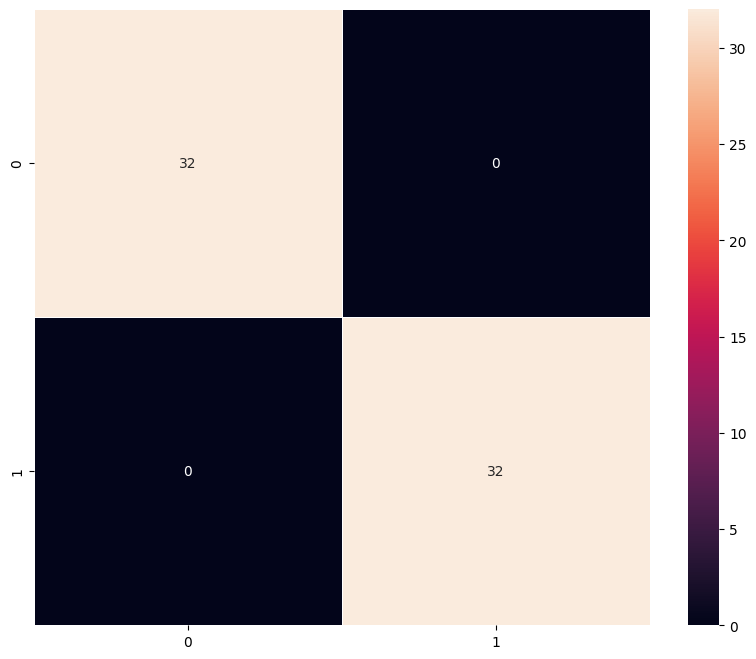

In [69]:
# print confusion matrix for the test dataset
print("Confusion Matrix for Test Dataset:")
plot_confusion_matrix(vgg16_augmented_ffnn_model, X_test, y_test, ml=True)

#### Visualizing the predictions

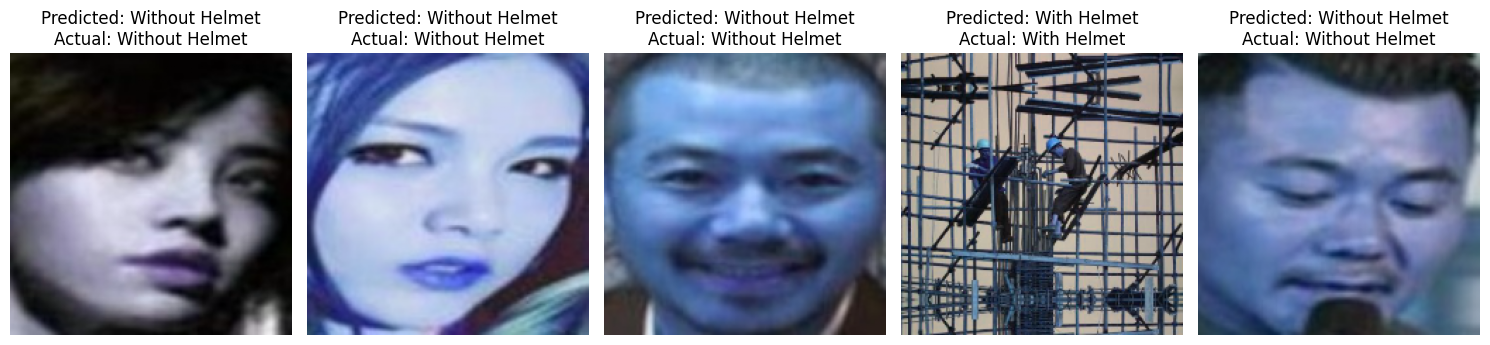

In [67]:
# Select random indices from the test set
random_test_indices = random.sample(range(len(X_test)), 5)

# Plot the selected images along with their predicted and actual labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_test_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Display the image using matplotlib
    predicted_label = predictions[idx][0]
    actual_label = y_test.iloc[idx]
    plt.title(f"Predicted: {'With Helmet' if predicted_label == 1 else 'Without Helmet'}\nActual: {'With Helmet' if actual_label == 1 else 'Without Helmet'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Model Performance Comparison and Final Model Selection**

## Test Performance

# **Actionable Insights & Recommendations**

-
-

<font size=5 color='blue'>Power Ahead!</font>
___